In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC

In [7]:
dataset=pd.read_csv("loan (1).csv")
dataset.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [8]:
x=dataset.drop(columns=['Loan_ID','Loan_Status'])
y=dataset['Loan_Status']

In [10]:
numeric_features=x.select_dtypes(include=['int64','float']).columns.tolist()
numeric_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
categorical_features=x.select_dtypes(include=['object']).columns.tolist()
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [15]:
y.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [24]:
y_train.value_counts(normalize=True)

Y    0.686354
N    0.313646
Name: Loan_Status, dtype: float64

In [25]:
numeric_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [26]:
categorical_transform=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [27]:
x.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [28]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transform,numeric_features),('cat',categorical_transform,categorical_features)])

In [29]:
clf=Pipeline(steps=[('preprocessor',preprocessor),('classifier',SVC(kernel='linear'))])

In [30]:
clf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', SVC(kernel='linear'))])

In [32]:
score=clf.score(x_test,y_test)
print('accuracy',score)

accuracy 0.8536585365853658


In [36]:
x_test_prediction=clf.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
test_data_accuracy

0.8536585365853658

In [37]:
cf=confusion_matrix(y_test,x_test_prediction)
cf

array([[21, 17],
       [ 1, 84]], dtype=int64)

In [38]:
clf.classes_

array(['N', 'Y'], dtype=object)

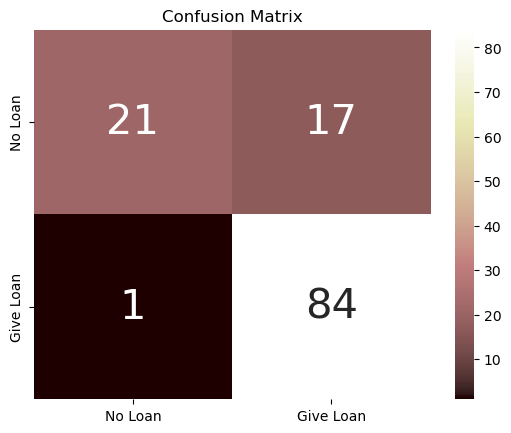

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.axes()
sns.heatmap(cf,annot=True,annot_kws={"size":30},fmt='d',cmap="pink",xticklabels=['No Loan','Give Loan'],yticklabels=['No Loan','Give Loan'],ax=ax)
ax.set_title('Confusion Matrix')
plt.show()